Classifica els diferents vols utilitzant l'algoritme de clustering jeràrquic:

In [1]:
# Import useful libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
# Open Modified Dataset:

dades = pd.read_csv("new_df_delays.csv")

dades.drop(columns=["Unnamed: 0"], inplace = True)

In [3]:
# Given the extremely large computational power used by the Dendogram, a sample of 0,5% has been randomly chosen
# Still, the Dendogram will take very long to calculate

reduced_df = dades.sample(10000, random_state=1)

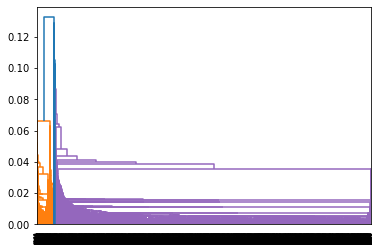

In [4]:
# Hierarchical dendogram:

dend = shc.dendrogram(shc.linkage(reduced_df))

# Execution time: 6 min 30

# The largest continuous vertical line happens between 0.13 and 0.11, which means that the best would be to split
# the sample into 2 clusters

In [5]:
# We now take a larger sample, since the calculations for the Agglomerative Clustering do not take as long
# Still, a sample of 25k cases is the largest that has been found to be workable

larger_sample = dades.sample(25000, random_state=1)

In [6]:
# With the insight from the dendogram in mind, we now proceed to analyse the entire dataset 

model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(larger_sample)

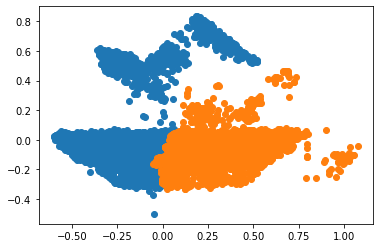

In [7]:
# Get the array with the labels:

u_labels = np.unique(labels)
 
# Plotting the results:
 
for i in u_labels:
    filtered_label = larger_sample[labels == i]
    plt.scatter(filtered_label["0"] , filtered_label["1"])
    
# Intuitively, the results could be improved. It appears like a quite lazy or poor representation

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette:

In [8]:
# Calculate Silhouette Score by running the Agglomerative Model through 2 to 7 clusters:

silhouette_coefficients = []

for k in range(2, 7):    
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(larger_sample)
    score = silhouette_score(larger_sample, labels)
    silhouette_coefficients.append(score)


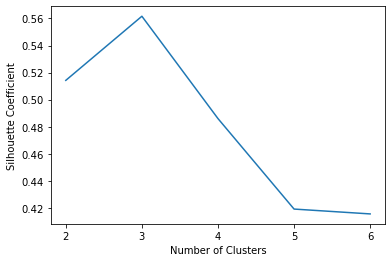

In [9]:
# Now we plot the Silhouette Coefficient:

plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.show()

# Apparently, 3 clusters would be a better explanation for this model.

In [10]:
# Let us try again, now with 3 clusters:

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(larger_sample)

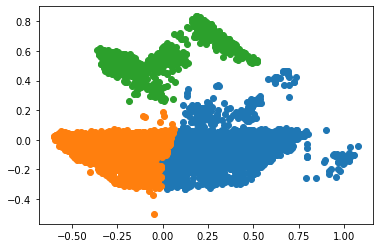

In [11]:
# Plotting the results:

u_labels = np.unique(labels)

for i in u_labels:
    filtered_label = larger_sample[labels == i]
    plt.scatter(filtered_label["0"] , filtered_label["1"])
    
# This distribution looks quite more intuitive.